In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [30]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


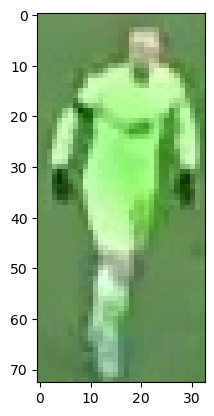

In [31]:
plt.imshow(image)
plt.show()

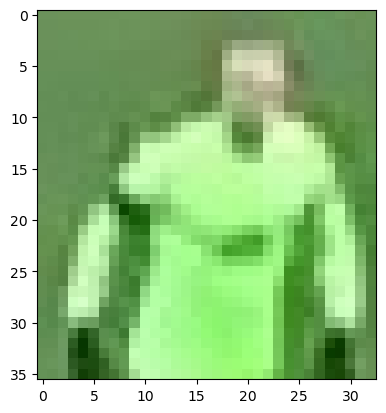

In [32]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

In [33]:
# Clustering the image into to clusters, reshape the image onto 2d array
image_2d = top_half_image.reshape(-1, 3)

In [34]:
# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

c:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

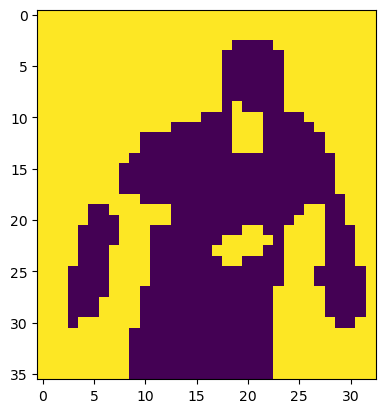

In [35]:
# gte the cluster labels
labels = kmeans.labels_

# reshape the labels into the original image sahpe
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])
plt.imshow(clustered_image)
plt.show()

In [36]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [37]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [38]:
kmeans.cluster_centers_[player_cluster]

array([173.16283925, 237.95615866, 148.20876827])